In [44]:
import os
import random
import sys

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

#from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#from sklearn.linear_model import Ridge

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
#from sklearn.multioutput import MultiOutputRegressor
import math
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.metrics import r2_score
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt


# Random split

In [45]:


# Load dataset
df = pd.read_excel('database_new.xlsx')
Y = df.iloc[:, 25:28]
X = df.iloc[:, :8]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.25,
    random_state=42)

scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




Mean absolute error on test set:  [0.00388441 0.00331197 0.00588038]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.00388441 0.00331197 0.00588038]


<AxesSubplot:>

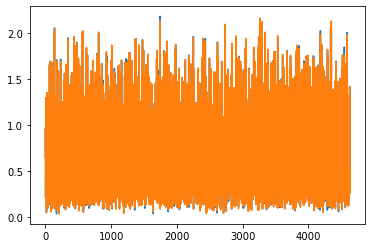

In [46]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

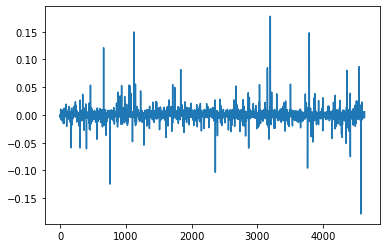

In [47]:
Y_diff['q_abs'].plot()

<AxesSubplot:>

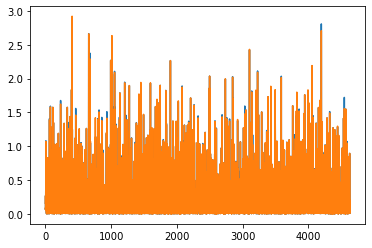

In [48]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

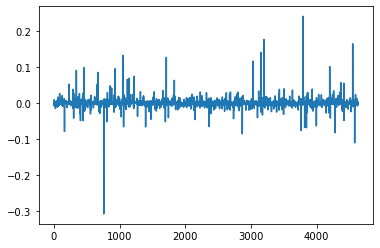

In [49]:
Y_diff['q_sca'].plot()

<AxesSubplot:>

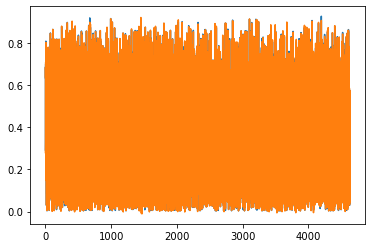

In [50]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

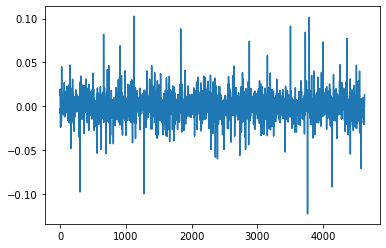

In [51]:
Y_diff['g'].plot()

<AxesSubplot:>

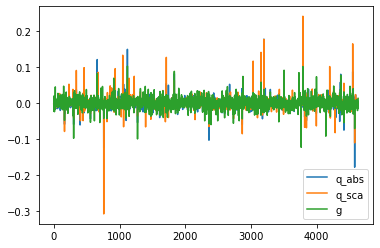

In [52]:
Y_diff.plot()

<AxesSubplot:>

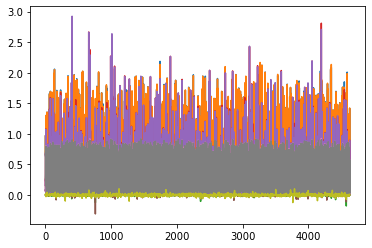

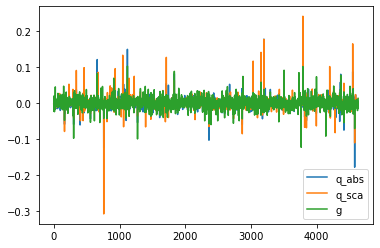